# HW1: Predicting type of Wine

## 1. Introduction

The Wine dataset is available in UCI Machine Learning Repository <sup>[1]</sup> and was referenced in a paper about determining wine preferences based on physicochemical properties<sup>[2]</sup>

The intent of the paper was to model the taste preferences based on data collected about the Wine. Authors claim that such a model will support Wine Certification and help the Wine production process.

The original datasets contains Red and White variants of the Portuguese Vinho Verde Wines. In this report, we will look at predicting the Type of wine (Red or White) based on the physicochemical properties of Wine

## 2. Summary of Results

1. 60% of the Data was used for training. 40% of the data was used as a validation test. Accuracy is shown on the test set and on the overall set with specific permuation of parameters.

| Variables Used | Test Set Accuracy | Overall Accuracy | Test Set AUC| Overall AUC |
|--------------------------------|-------------------|----------------------|-----|-----|
|Total Sulfur Dioxide| 92.50% | 92.63% | 87.6% | 87.8% |
|Total Sulfur Dioxide,Chlorides,| 97.65% | 97.48% | 96,6% | 96.4 % |        
| All variables except Class       | 98%|  98.1  %| 96.5% | 96.7%| 

2. As seen here, Chlorides and Total Sulfur Dioxide were sufficient to classify Red and White wine with accuracy > 95%
3. With the model with all variables (except Class) TestSet AUC = 0.965 and Overall AUC = .967
4. With the model with 2 variables (Chlorides and Total Sulfur Dioxide): TestSet AUC = 0.966 and Overall AUC = 0.964 
5. The Best AUC we can get = 0.971. This was using all the training set and all variables for the model.

#### Answers to Questions:
1. What is the percentage of correct classification results (using all attributes)?
   Training with 60% of Data; Accuracy on Test Set (40%) is 98% and on the Entire set is 98.1%
   
2. What is the percentage of correct classification results (using a subset of the attributes)?
    Accuracty with just using Total Sulfer Dioxide and Chlorides is 97.65% on Test set.

3. What is the AUC of your model?
  AUC of 0.965 on Test Set and 0.967 on the overall set; This is using all variables (except Class)

4. What is the best AUC that you can achieve?
    The Best AUC we can get = 0.971. This was using all the training set and all variables for the model.

5. Which are the the minimum number of attributes? Why?
     With the model with 2 variables (Chlorides and Total Sulfur Dioxide): TestSet AUC = 0.966 and Overall AUC = 0.964 
     These variable seem to have high correlation to Class hence they seem to suffice for 95% accuracy classification

## 3. Problem and Dataset Overview

The problem given here is to distinguish/predict the class of the Wine (Red/White) based on the the phyicochemical properties of the Wine. The dataset has 6497 instance of Wine with 13 properties about the wine. The properties include physicochemical properties like pH value, concentration of citric acid, residual sugar etc. One variable, "Quality" is an average of the quality value as graded by 3 wine experts. 

All the datapoints are numerical. Class of Wine is numerical but as there are only two classes, they can be treated as Factors.In the next few sections, I will try to predict the Class of wine based on its properties.

## 4. Exploratory Data Analysis

<TBD> Write some information about the model

In [94]:
# Code is a adapted from Wee Hyong's code library[3]

# Read wine data
wine = read.csv("RedWhiteWine.csv", stringsAsFactors = FALSE)

# Dimensions of the data
dim(wine)

[1] 6497   13

In [95]:
# Details about the variables
str(wine)

'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ Class               : int  1 1 1 1 1 1 1 1 1 1 ...


In [96]:
#Summary of Wine Data
summary(wine)


 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500   1st Qu.: 1.800  
 Median : 7.000   Median :0.2900   Median :0.3100   Median : 3.000  
 Mean   : 7.215   Mean   :0.3397   Mean   :0.3186   Mean   : 5.443  
 3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900   3rd Qu.: 8.100  
 Max.   :15.900   Max.   :1.5800   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  1.00      Min.   :  6.0        Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0        1st Qu.:0.9923  
 Median :0.04700   Median : 29.00      Median :118.0        Median :0.9949  
 Mean   :0.05603   Mean   : 30.53      Mean   :115.7        Mean   :0.9947  
 3rd Qu.:0.06500   3rd Qu.: 41.00      3rd Qu.:156.0        3rd Qu.:0.9970  
 Max.   :0.61100   Max.   :289.00      Max.   :440.0   

In [97]:
# Are there missing values
sum(is.na(wine))

[1] 0

In [98]:
library(reshape2)
head(wine)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Class
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,1
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,1


Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"

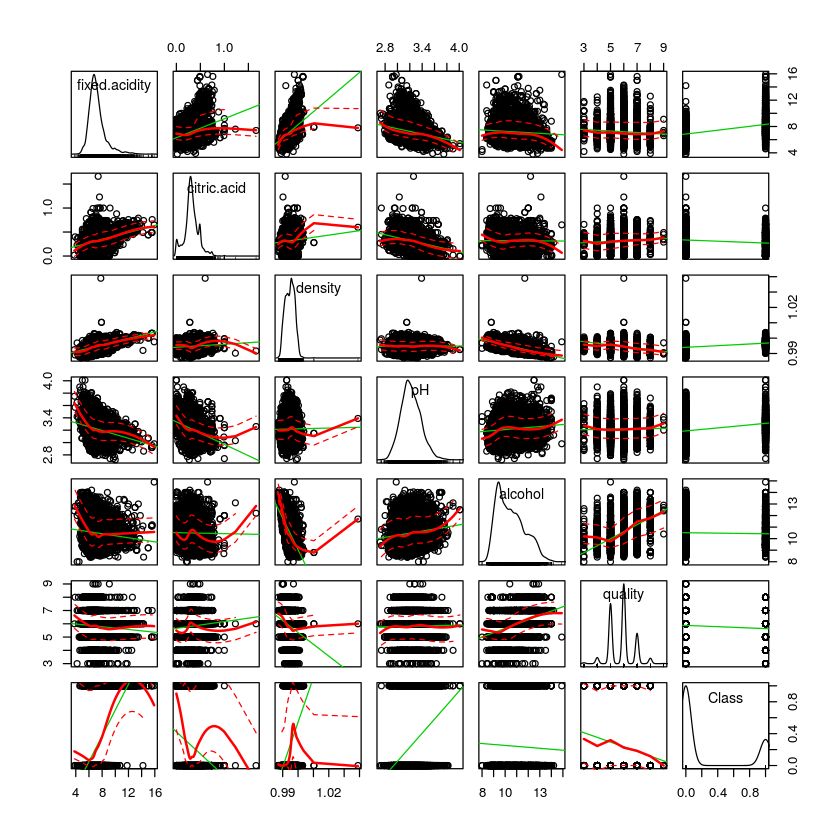

In [99]:
require(car)
scatterplotMatrix(~fixed.acidity + citric.acid + density + pH + alcohol + quality + Class, data = wine)

Reviewing the graph it is not clear if many variables have direct correlation with Class. This needs further exploration of actual correlation values.

Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"Warning message in smoother(x, y, col = col[2], log.x = FALSE, log.y = FALSE, spread = spread, :
"could not fit smooth"

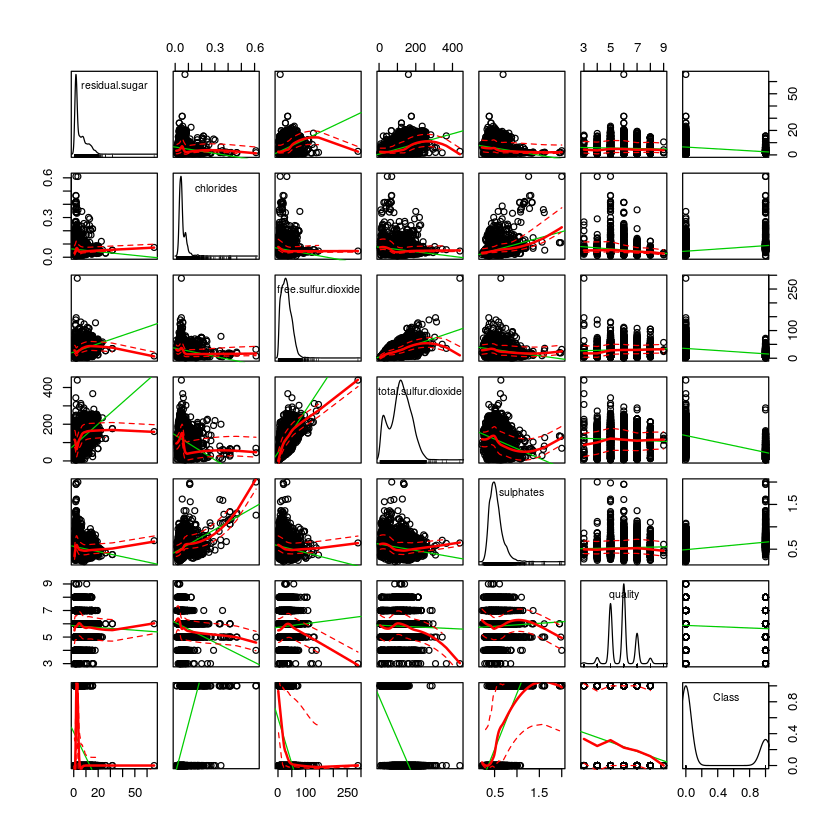

In [100]:
scatterplotMatrix(~residual.sugar + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + sulphates + quality + Class, data = wine)

Reviewing the graph it is not clear if many variables have direct correlation with Class. This needs further exploration of actual correlation values.

In [101]:
library(ellipse)
winecor = cor( wine[, c('fixed.acidity','volatile.acidity', 'citric.acid', 'residual.sugar','chlorides','free.sulfur.dioxide',
                        'total.sulfur.dioxide', 'density' , 'pH' , 'sulphates','alcohol','quality',"Class")], method = "pearson")

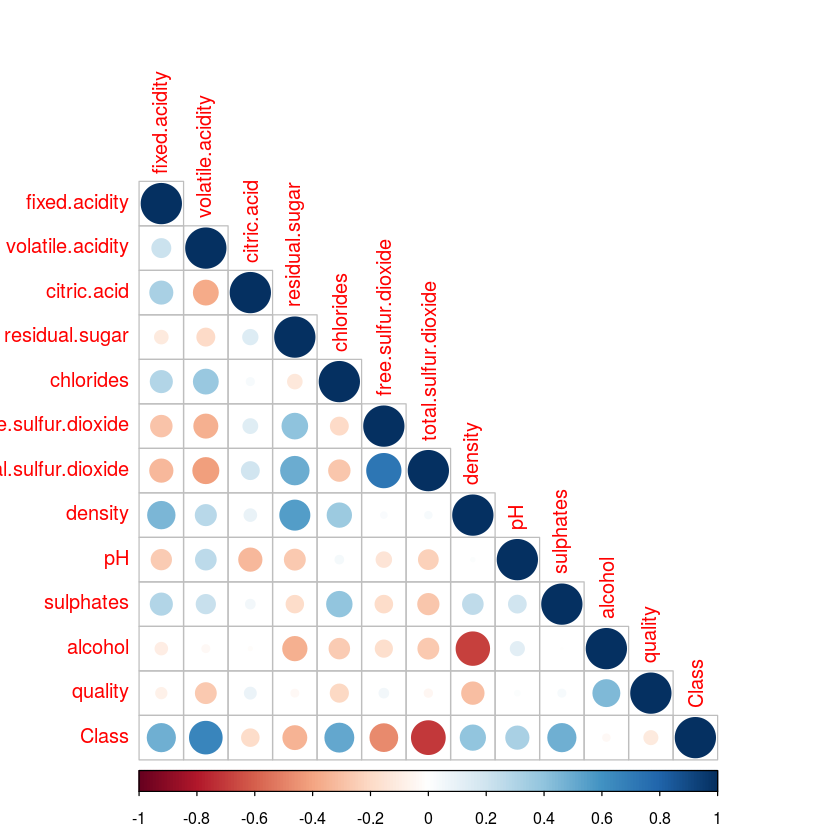

In [102]:
library(corrplot)
corrplot(winecor, method="circle", type='lower')

The correlation plot shows strong correlation of the Class with following variables
a. Total Sulfur Dioxide
b. Volatile Acidity
c. Fixed Acidity
d. Chrolides
e. Free Sulfur dioxide
f. Sulphates

It also shows that Class has very low correlation with:
a. Quality
b. Alcohol

### Data Preparation

In [103]:
set.seed(1)

# 60% of the data will be training set
train <- sample(nrow(wine), 0.6 * nrow(wine))
test = -train
#setting up training set
winetrain = wine[train,]

#setting test set
winetest = wine[test,]

#confirming dimensions of training and test set
dim(winetrain)
dim(winetest)

[1] 3898   13

[1] 2599   13

In [104]:
# Information about the variables
str(winetrain)

'data.frame':	3898 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 6.2 7.7 5.6 7 6.3 5.8 7.6 6.3 6.6 ...
 $ volatile.acidity    : num  0.39 0.3 0.39 0.26 0.62 0.23 0.12 0.18 0.27 0.735 ...
 $ citric.acid         : num  0.23 0.17 0.28 0 0.1 0.33 0.21 0.28 0.37 0.02 ...
 $ residual.sugar      : num  7 2.8 4.9 10.2 1.4 6.9 1.3 7.1 7.9 7.9 ...
 $ chlorides           : num  0.033 0.04 0.035 0.038 0.071 0.052 0.056 0.041 0.047 0.122 ...
 $ free.sulfur.dioxide : num  29 24 36 13 27 23 35 29 58 68 ...
 $ total.sulfur.dioxide: num  126 125 109 111 63 118 121 110 215 124 ...
 $ density             : num  0.994 0.994 0.992 0.993 0.996 ...
 $ pH                  : num  3.14 3.01 3.19 3.44 3.28 3.23 3.32 3.2 3.19 3.47 ...
 $ sulphates           : num  0.42 0.46 0.58 0.46 0.61 0.46 0.33 0.42 0.48 0.53 ...
 $ alcohol             : num  10.5 9 12.2 12.4 9.2 10.4 11.4 9.2 9.5 9.9 ...
 $ quality             : int  5 5 7 6 5 6 6 6 6 5 ...
 $ Class               : int  0 0 0 0 1 0 0 0 0 1 ...


All the variables are numeric. Class is a binary variable that has been converted into "Factor" type variable

## 5. Learning and Results (Model: Decision Trees)

In [105]:
#Loading decision tree library
library(rpart)

# Confirming that Class of the wine is assigned as a "factor"
wine$Class = as.factor(wine$Class)

# Running decision tree algorithm on the training data.
tree.wine = rpart(Class ~., wine, subset = train)

# Summary of the results
summary(tree.wine)

Call:
rpart(formula = Class ~ ., data = wine, subset = train)
  n= 3898 

          CP nsplit  rel error     xerror        xstd
1 0.70600414      0 1.00000000 1.00000000 0.027904388
2 0.06469979      1 0.29399586 0.30434783 0.017067425
3 0.05175983      3 0.16459627 0.16149068 0.012668236
4 0.04140787      4 0.11283644 0.13250518 0.011518014
5 0.01000000      5 0.07142857 0.08799172 0.009439409

Variable importance
total.sulfur.dioxide            chlorides  free.sulfur.dioxide 
                  33                   20                   13 
    volatile.acidity        fixed.acidity          citric.acid 
                  10                    7                    7 
      residual.sugar              density            sulphates 
                   4                    4                    2 
                  pH 
                   1 

Node number 1: 3898 observations,    complexity param=0.7060041
  predicted class=0  expected loss=0.2478194  P(node) =1
    class counts:  2932   966
 

### Key aspects from Decision tree Summary:
1. Top 5 Key variables from decision tree are :- Total Sulfer Dioxide, Cholorides, Free Sulfer Dioxide,  Volatile Acidity Fixed Acidity and Citric Acid levels

2. Quality, Density and Alcohol were not used at all in the decision tree.

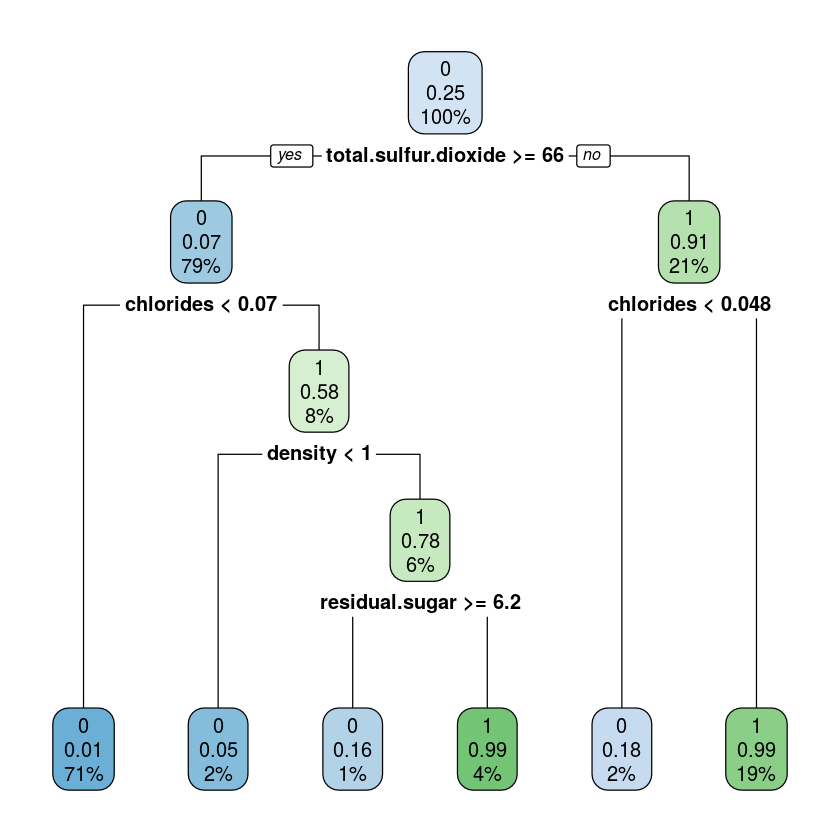

In [106]:
#Plotting decision tree
require(rpart.plot)
rpart.plot(tree.wine)

In [107]:
#Predicting the Wine Class for the test set
predict.WineClass = predict(tree.wine, winetest, type = "class")

#Testing accurracy on the Test set
winetable = table(predict.WineClass, winetest$Class)
winetable
acc = sum(diag(winetable))/sum(winetable) 
print(paste0("Accuracy:",acc))

                 
predict.WineClass    0    1
                0 1954   40
                1   12  593

[1] "Accuracy:0.979992304732589"


In [108]:
# Using library for the confusion matrix
library(caret)
confusionMatrix(winetable)

Confusion Matrix and Statistics

                 
predict.WineClass    0    1
                0 1954   40
                1   12  593
                                         
               Accuracy : 0.98           
                 95% CI : (0.9738, 0.985)
    No Information Rate : 0.7564         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9449         
 Mcnemar's Test P-Value : 0.000181       
                                         
            Sensitivity : 0.9939         
            Specificity : 0.9368         
         Pos Pred Value : 0.9799         
         Neg Pred Value : 0.9802         
             Prevalence : 0.7564         
         Detection Rate : 0.7518         
   Detection Prevalence : 0.7672         
      Balanced Accuracy : 0.9654         
                                         
       'Positive' Class : 0              
                                         

In [109]:
#Calculating AUC and ROC
library(pROC)
wine.ROC = roc(as.numeric(wine$Class), as.numeric(predict.WineClass))
plot(wine.ROC)

auc.ROC = auc(wine.ROC)
auc.ROC

ERROR: Error in roc.default(as.numeric(wine$Class), as.numeric(predict.WineClass)): Response and predictor must be vectors of the same length.


In [110]:
#Trying the prediction on the entire class
predict.WineClass = predict(tree.wine, wine, type = "class")
winetable = table(predict.WineClass, wine$Class)
winetable
acc = sum(diag(winetable))/sum(winetable) 
print(paste0("Accuracy:",acc))
confusionMatrix(winetable)

                 
predict.WineClass    0    1
                0 4875   98
                1   23 1501

[1] "Accuracy:0.981376019701401"


Confusion Matrix and Statistics

                 
predict.WineClass    0    1
                0 4875   98
                1   23 1501
                                          
               Accuracy : 0.9814          
                 95% CI : (0.9778, 0.9845)
    No Information Rate : 0.7539          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.949           
 Mcnemar's Test P-Value : 1.729e-11       
                                          
            Sensitivity : 0.9953          
            Specificity : 0.9387          
         Pos Pred Value : 0.9803          
         Neg Pred Value : 0.9849          
             Prevalence : 0.7539          
         Detection Rate : 0.7503          
   Detection Prevalence : 0.7654          
      Balanced Accuracy : 0.9670          
                                          
       'Positive' Class : 0               
                                          


Call:
roc.default(response = as.numeric(wine$Class), predictor = as.numeric(predict.WineClass))

Data: as.numeric(predict.WineClass) in 4898 controls (as.numeric(wine$Class) 1) < 1599 cases (as.numeric(wine$Class) 2).
Area under the curve: 0.967

Area under the curve: 0.967

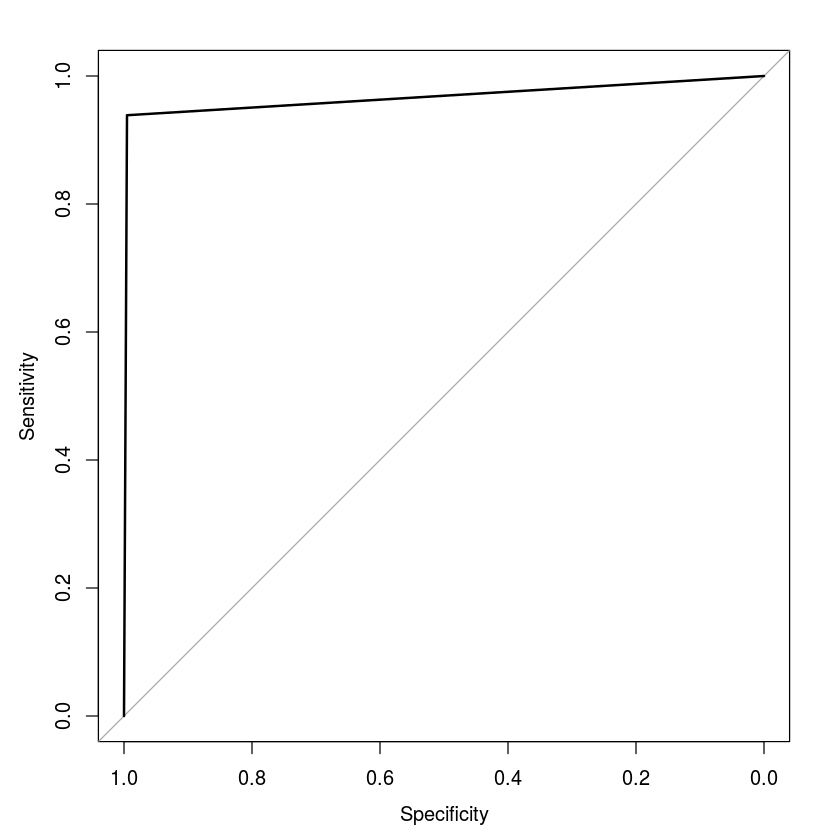

In [111]:
#Calculating the ROC and AUC Values
wine.ROC = roc(as.numeric(wine$Class), as.numeric(predict.WineClass))
plot(wine.ROC)

auc.ROC = auc(wine.ROC)
auc.ROC

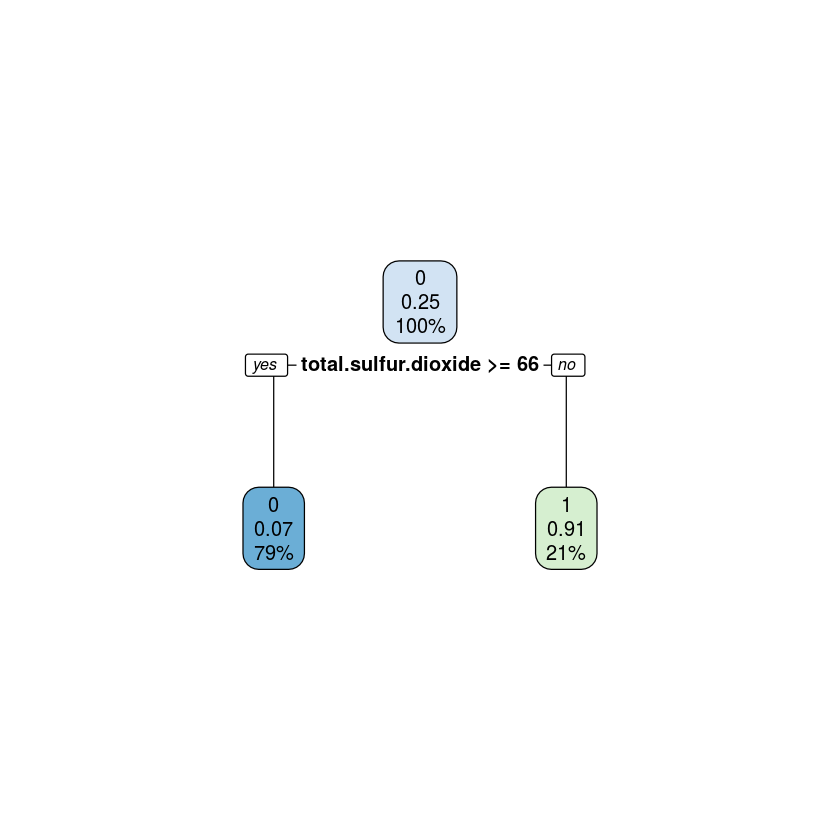

In [112]:
# Trying the Decision tree experiment with just Total Sulfur Dioxide
tree.wine = rpart(Class ~. -quality-pH-alcohol-density-residual.sugar-sulphates-citric.acid
                    -free.sulfur.dioxide-fixed.acidity-volatile.acidity-chlorides, 
                    wine, subset = train)
rpart.plot(tree.wine)

Confusion Matrix and Statistics

                     
predict.WineTestClass    0    1
                    0 1910  139
                    1   56  494
                                          
               Accuracy : 0.925           
                 95% CI : (0.9142, 0.9348)
    No Information Rate : 0.7564          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7869          
 Mcnemar's Test P-Value : 4.302e-09       
                                          
            Sensitivity : 0.9715          
            Specificity : 0.7804          
         Pos Pred Value : 0.9322          
         Neg Pred Value : 0.8982          
             Prevalence : 0.7564          
         Detection Rate : 0.7349          
   Detection Prevalence : 0.7884          
      Balanced Accuracy : 0.8760          
                                          
       'Positive' Class : 0               
                                


Call:
roc.default(response = as.numeric(winetest$Class), predictor = as.numeric(predict.WineTestClass))

Data: as.numeric(predict.WineTestClass) in 1966 controls (as.numeric(winetest$Class) 0) < 633 cases (as.numeric(winetest$Class) 1).
Area under the curve: 0.876

Area under the curve: 0.876

Confusion Matrix and Statistics

                 
predict.WineClass    0    1
                0 4768  349
                1  130 1250
                                          
               Accuracy : 0.9263          
                 95% CI : (0.9196, 0.9325)
    No Information Rate : 0.7539          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7917          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9735          
            Specificity : 0.7817          
         Pos Pred Value : 0.9318          
         Neg Pred Value : 0.9058          
             Prevalence : 0.7539          
         Detection Rate : 0.7339          
   Detection Prevalence : 0.7876          
      Balanced Accuracy : 0.8776          
                                          
       'Positive' Class : 0               
                                          

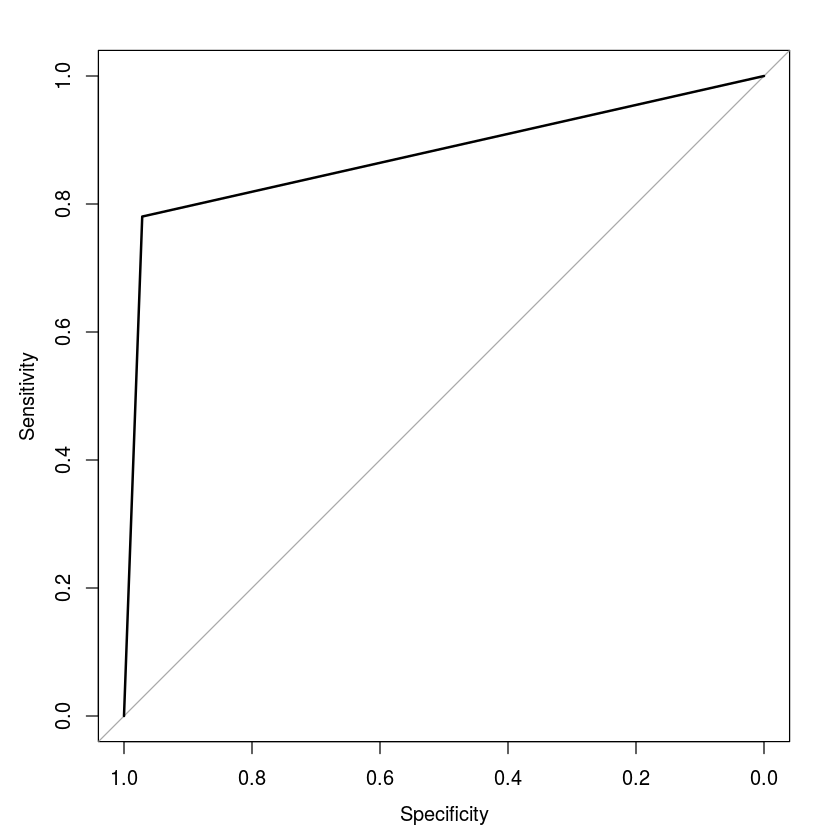


Call:
roc.default(response = as.numeric(wine$Class), predictor = as.numeric(predict.WineClass))

Data: as.numeric(predict.WineClass) in 4898 controls (as.numeric(wine$Class) 1) < 1599 cases (as.numeric(wine$Class) 2).
Area under the curve: 0.8776

Area under the curve: 0.8776

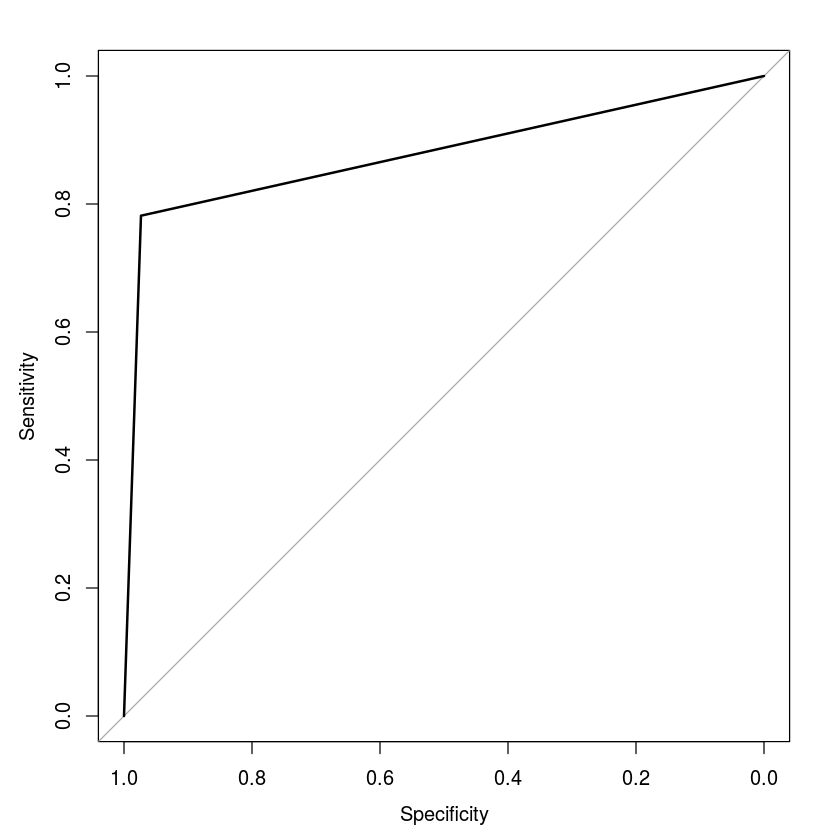

In [113]:
predict.WineTestClass = predict(tree.wine, winetest, type = "class")
winetable = table(predict.WineTestClass, winetest$Class)
confusionMatrix(winetable)

library(pROC)
wine.ROC = roc(as.numeric(winetest$Class), as.numeric(predict.WineTestClass))
plot(wine.ROC)

auc.ROC = auc(wine.ROC)
auc.ROC

predict.WineClass = predict(tree.wine, wine, type = "class")
winetable = table(predict.WineClass, wine$Class)
confusionMatrix(winetable)


wine.ROC = roc(as.numeric(wine$Class), as.numeric(predict.WineClass))
plot(wine.ROC)
auc.ROC = auc(wine.ROC)
auc.ROC

Confusion Matrix and Statistics

                 
predict.WineClass    0    1
                0 4859   78
                1   39 1521
                                          
               Accuracy : 0.982           
                 95% CI : (0.9785, 0.9851)
    No Information Rate : 0.7539          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9511          
 Mcnemar's Test P-Value : 0.0004429       
                                          
            Sensitivity : 0.9920          
            Specificity : 0.9512          
         Pos Pred Value : 0.9842          
         Neg Pred Value : 0.9750          
             Prevalence : 0.7539          
         Detection Rate : 0.7479          
   Detection Prevalence : 0.7599          
      Balanced Accuracy : 0.9716          
                                          
       'Positive' Class : 0               
                                          


Call:
roc.default(response = as.numeric(wine$Class), predictor = as.numeric(predict.WineClass))

Data: as.numeric(predict.WineClass) in 4898 controls (as.numeric(wine$Class) 1) < 1599 cases (as.numeric(wine$Class) 2).
Area under the curve: 0.9716

Area under the curve: 0.9716

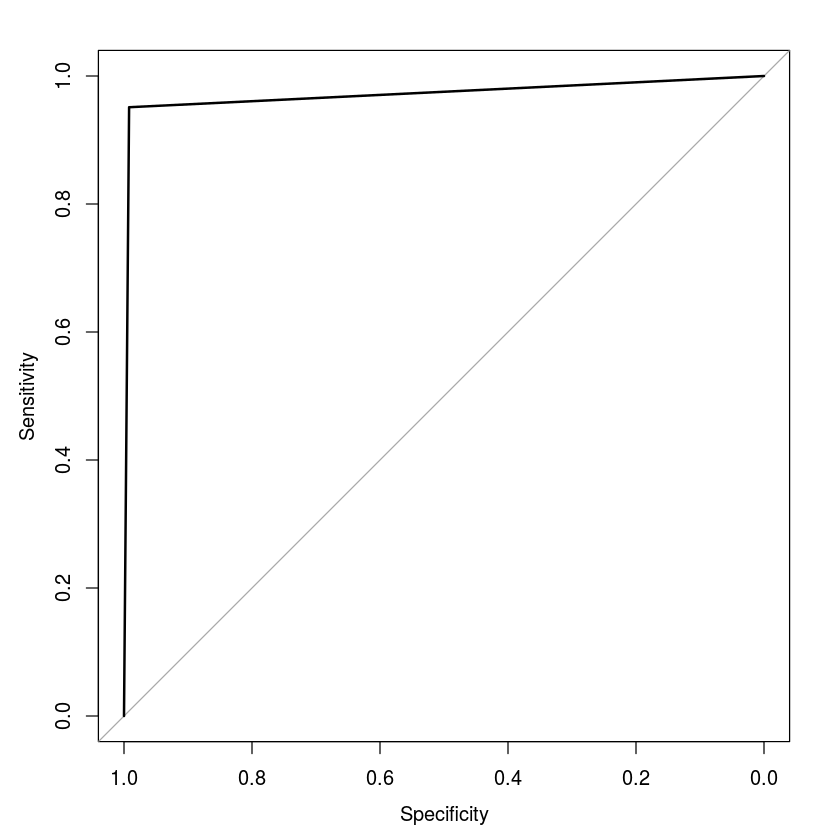

In [114]:
#Training and testing on the entire set
tree.wine = rpart(Class ~., wine)
predict.WineClass = predict(tree.wine, wine, type = "class")
winetable = table(predict.WineClass, wine$Class)
confusionMatrix(winetable)
wine.ROC = roc(as.numeric(wine$Class), as.numeric(predict.WineClass))
plot(wine.ROC)
auc.ROC = auc(wine.ROC)
auc.ROC

## 6. References

1. https://archive.ics.uci.edu/ml/datasets/Wine+Quality
2. P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. 
3. Refernece Code: https://notebooks.azure.com/weehyong/libraries/uwdatasci450spring2017/